In [ ]:
## PYTHON FOR DATASCIENCE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data={'Year':[2010,2011,2012,
             2010,2011,2012,
             2010,2011,2012],
      'Team':['Fcbarcelona','Fcbarcelona','Fcbarcelona',
              'Rmadrid','Rmadrid','Rmadrid',
              'ValenciaCF','ValenciaCF','ValenciaCF'
          
      ],
      'Wins':[30,28,32,29,32,26,21,17,19],
      'Draws':[6,7,4,5,4,7,8,10,8],
      'Losses':[2,3,2,4,2,5,9,11,11]
    }
football=pd.DataFrame (data,columns=['Year','Team','Wins','Draws','Losses'])

In [5]:
football

,Year,Team,Wins,Draws,Losses
0,2010,Fcbarcelona,30,6,2
1,2011,Fcbarcelona,28,7,3
2,2012,Fcbarcelona,32,4,2
3,2010,Rmadrid,29,5,4
4,2011,Rmadrid,32,4,2
5,2012,Rmadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


In [7]:
edu=pd.read_csv("https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch02/educ_figdp_1_Data.csv",na_values=';',usecols=['TIME','GEO','Value'])


In [8]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [9]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [ ]:
edu.tail()

In [15]:
edu.describe()

,TIME
count,384.000000
mean,2005.500000
std,3.456556
min,2000.000000
25%,2002.750000
50%,2005.500000
75%,2008.250000
max,2011.000000


In [16]:
edu['Value']

0         :
1         :
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: object

In [24]:
edu['Value']=pd.to_numeric(edu['Value'],downcast='float',errors='coerce')

In [26]:
edu.dtypes

TIME       int64
GEO       object
Value    float32
dtype: object

In [27]:
edu[10:14]    # SLICE OF A ROW

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [34]:
edu.loc[90:94,['TIME','GEO']]   # ILOC IS FOR STRING OR BOOLEAN INDEXING

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [35]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [38]:
edu.isnull().sum()

TIME      0
GEO       0
Value    23
dtype: int64

In [39]:
edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [46]:
print ("Pandas max value:", edu['Value'].max())       # Pandas max value fun will ingore NaN values where as python fun will consider them
print ("Python max value:", max(edu['Value']))

Pandas max value: 8.8100004196167
Python max value: nan


In [47]:
s=edu['Value']/100                # Applying birnary arithmetic operations

In [48]:
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float32

In [50]:
s=edu['Value'].apply(np.sqrt)   #Applying square root function
s.head() 

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224859
Name: Value, dtype: float32

In [53]:
s=edu['Value'].apply(lambda d:d**2)              # Applying lambda function
s.head()

0          NaN
1          NaN
2    25.000000
3    25.300902
4    24.502498
Name: Value, dtype: float64

In [65]:
edu['ValueNorm']=edu['Value']/edu['Value'].max()             #Adding new column by dividing value with max value
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777525
383,2011,Finland,6.76,0.767310


In [66]:
edu.drop('ValueNorm',axis=1,inplace=True)      # Dropping a columns setting axis=1, if we set axis=0 rows will be deleted
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [63]:
edu.drop('ValuNorm',axis=1,inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [102]:
edu=edu.append({'TIME':2008, 'Value':5.0,'GEO':'a'},  
               ignore_index=True)                              #Inserting new row at the bottom of the DataFrame
edu.tail()

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_16904\995851806.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  edu=edu.append({'TIME':2008, 'Value':5.0,'GEO':'a'},


,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2008,a,5.0


In [80]:
edu=edu.drop(labels=[385], axis=0)               # Deleting a row from the table

In [82]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2008,a,5.00


In [105]:
edu.drop(max(edu.index),axis=0,inplace=True)   # Dropping a row using max index function

In [106]:
edu.tail()

,TIME,GEO,Value
378,2006,Finland,6.18
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [117]:
edu.Drop=edu.drop(edu['Value'=='':''],axis=0)

TypeError: cannot do slice indexing on RangeIndex with these indexers [False] of type bool

In [112]:
edu['Value'].isnull().sum()

0

In [118]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
378,2006,Finland,6.18
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81


In [123]:
eduFilled=edu.fillna(value={"Value":0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [125]:
eduReplace=edu['Value'].replace([':','0'])

In [131]:
eduReplace

0         :
1         :
2      5.00
3      5.03
4      4.95
       ... 
378    6.18
379    5.90
380    6.10
381    6.81
382    6.85
Name: Value, Length: 383, dtype: object

In [134]:
edu.isnull().count()

TIME     383
GEO      383
Value    383
dtype: int64

In [136]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TIME    383 non-null    int64 
 1   GEO     383 non-null    object
 2   Value   383 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.1+ KB


In [137]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
378,2006,Finland,6.18
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81


In [10]:
edu.rename(columns={'European Union (28 countries)':'EU'},inplace=True)

In [12]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [14]:
edu=edu.append({'TIME':2000,'GEO':'A','Value':5.6},ignore_index=True)

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_2508\2044585770.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  edu=edu.append({'TIME':2000,'GEO':'A','Value':5.6},ignore_index=True)


In [15]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [21]:
edu.sort_values(by='Value',ascending=False,inplace=True)

In [22]:
edu

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44
...,...,...,...
262,2010,Luxembourg,NaN
263,2011,Luxembourg,NaN
342,2006,Romania,NaN
344,2008,Romania,NaN


In [20]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    385 non-null    int64  
 1   GEO     385 non-null    object 
 2   Value   362 non-null    float32
dtypes: float32(1), int64(1), object(1)
memory usage: 7.6+ KB


In [19]:
edu['Value']=pd.to_numeric(edu['Value'],downcast='float',errors='coerce')

In [23]:
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [24]:
edu.isnull().sum()

TIME      0
GEO       0
Value    23
dtype: int64

In [25]:
eduFilled=edu.fillna(value={'Value':'0'})

In [26]:
edu

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44
...,...,...,...
262,2010,Luxembourg,NaN
263,2011,Luxembourg,NaN
342,2006,Romania,NaN
344,2008,Romania,NaN


In [27]:
edu.isnull().sum()

TIME      0
GEO       0
Value    23
dtype: int64

In [28]:
eduFilled=edu.fillna(value={'Value':'0'})

In [29]:
eduFilled

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44
...,...,...,...
262,2010,Luxembourg,0
263,2011,Luxembourg,0
342,2006,Romania,0
344,2008,Romania,0


In [30]:
edu=edu.fillna(value={'Value':'0'})

In [33]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 130 to 348
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TIME    385 non-null    int64 
 1   GEO     385 non-null    object
 2   Value   385 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.0+ KB


In [36]:
edu['Value']=pd.to_numeric(edu['Value'],downcast='float',errors='coerce') # Converting Dtype

In [42]:
edu.sort_values(by='Value',ascending=False,
               inplace=True)                             # Sorting Values in descending order
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [43]:
edu.sort_index(axis=0,ascending=True,inplace=True)       # Sorting to the original order
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [44]:
group=edu[['GEO','Value']].groupby('GEO').mean()     # Groupby Function 
group

,Value
GEO,
A,5.600000
Austria,5.618333
Belgium,5.673333
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168334
Denmark,8.331667
Estonia,5.270833
Euro area (13 countries),4.600833


In [99]:
filtered_data=edu[edu['TIME']>2005]                         # Rearrangind Data, Column name as Year form 2005 from the filtered data
pvt_edu=pd.pivot_table(filtered_data,values='Value', 
                           index=['GEO'],
                           columns=['TIME'])                #Index- Country Name
pvt_edu.head()    

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [53]:
pvt_edu.loc[['Spain','Portugal'],[2006,2011]]           #Selecting specific rowsby label by using loc operator


TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


In [93]:
pvt_edu

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51
Denmark,7.97,7.81,7.68,8.74,8.81,8.75
Estonia,4.70,4.72,5.61,6.03,5.66,5.16
Finland,6.18,5.90,6.10,6.81,6.85,6.76
France,5.61,5.62,5.62,5.90,5.86,5.68


In [94]:

pvt_edu=pvt_edu.rename(index={'Germany (until 1990 former territory of the FRG)':'Germany'})
pvt_edu=pvt_edu.dropna()
pvt_edu.rank(ascending=False,method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,22.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,21.0,21.0,21.0,20.0,19.0


In [102]:
totalSum=pvt_edu.sum(axis=1)
totalSum.rank(ascending=False,method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

<AxesSubplot:title={'center':'Total Values for Country'}, xlabel='GEO'>

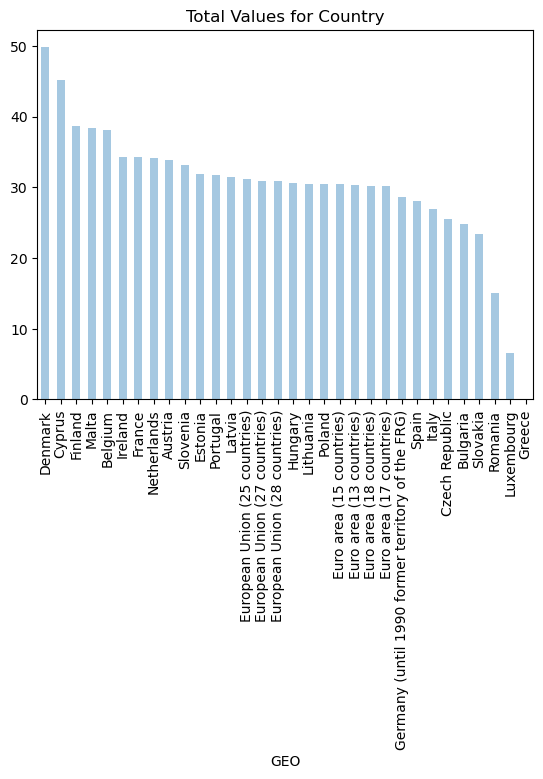

In [106]:
totalSum=pvt_edu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar',style='b',alpha=0.4,title='Total Values for Country')

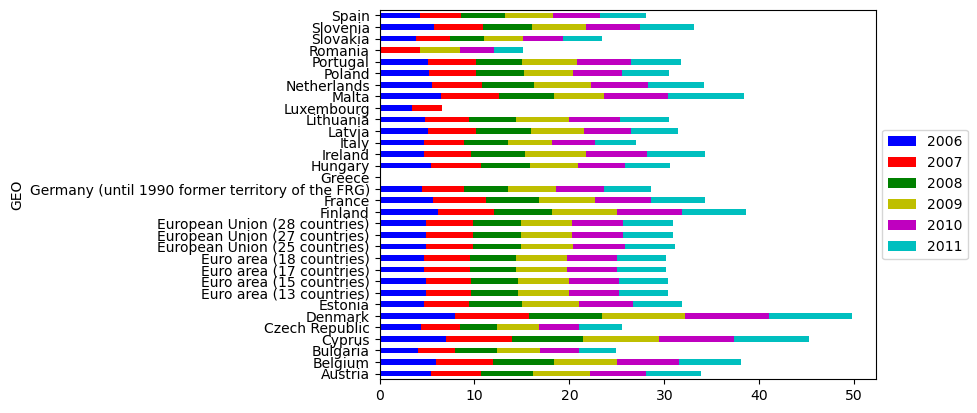

In [107]:
my_colors=['b','r','g','y','m','c']
ax=pvt_edu.plot(kind='barh',stacked=True,color=my_colors)
ax.legend(loc='center left',bbox_to_anchor=(1, .5))